# Part I - Propser Loan Data
## by (Samson Amwata)

## Introduction
This dataset contains loan information of about 113,937 rows with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> We have 113937 rows and 81 columns or features. From describe function it seems most of the features are numeric, some are categorical and others are time/periodical features 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in borrowers features and features related to loan or those that affect loan performance. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I will be focusing on the following columns that I suspect has effect on the loan performance  

``` 
[ListingNumber, CreditGrade',Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, BorrowerState, Occupation, EmploymentStatus, InvestmentFromFriendsCount, InvestmentFromFriendsAmount,LoanOriginalAmount,ProsperRating (Alpha),IncomeRange', StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanOriginalAmount, LoanOriginationDate,  MonthlyLoanPayment and Investors ]
```

In [96]:
columns_sub = ['ListingNumber', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 
               'BorrowerRate', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'InvestmentFromFriendsCount', 
               'InvestmentFromFriendsAmount', 'LoanOriginalAmount', 'ProsperRating (Alpha)','ProsperScore','IncomeRange', 
               'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'DebtToIncomeRatio','LoanOriginalAmount', 'LoanOriginationDate',  
               'MonthlyLoanPayment', 'Investors','IsBorrowerHomeowner' ]
loan_df = df[columns_sub]
loan_df.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,ProsperScore,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,NaN,"$25,000-49,999",3083.333333,0,0.17,9425,2007-09-12 00:00:00,330.43,258,True
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,7.0,"$50,000-74,999",6125.000000,0,0.18,10000,2014-03-03 00:00:00,318.93,1,False
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,NaN,Not displayed,2083.333333,0,0.06,3001,2007-01-17 00:00:00,123.32,41,False
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,9.0,"$25,000-49,999",2875.000000,0,0.15,10000,2012-11-01 00:00:00,321.45,158,True
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,4.0,"$100,000+",9583.333333,0,0.26,15000,2013-09-20 00:00:00,563.97,20,True


In [110]:
#Rename ProsperRating (Alpha) column by removing the (Alpha)
loan_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)
loan_df.head()

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\2014221369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)


,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner,loan_year,loan_month,HomeOwner
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,0,0.17,9425,2007-09-12 00:00:00,330.43,258,True,2007,9,Yes
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,0,0.18,10000,2014-03-03 00:00:00,318.93,1,False,2014,3,No
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,0,0.06,3001,2007-01-17 00:00:00,123.32,41,False,2007,1,No
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,0,0.15,10000,2012-11-01 00:00:00,321.45,158,True,2012,11,Yes
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,0,0.26,15000,2013-09-20 00:00:00,563.97,20,True,2013,9,Yes


In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   CreditGrade                  28953 non-null   object 
 2   Term                         113937 non-null  int64  
 3   LoanStatus                   113937 non-null  object 
 4   ClosedDate                   55089 non-null   object 
 5   BorrowerAPR                  113912 non-null  float64
 6   BorrowerRate                 113937 non-null  float64
 7   BorrowerState                108422 non-null  object 
 8   Occupation                   110349 non-null  object 
 9   EmploymentStatus             111682 non-null  object 
 10  InvestmentFromFriendsCount   113937 non-null  int64  
 11  InvestmentFromFriendsAmount  113937 non-null  float64
 12  LoanOriginalAmount           113937 non-null  int64  
 13 

## Data cleaning

#### Definition of data cleaning issues
1. Remove duplicates rows
2. Convert the date columns to date data type
3. Rename ProsperRating (Alpha) column to `ProsperRating`
4. Replace `NaT` dates to Null
5. Add new columns Month and Year pulled from loanOriginateDate column
6. We have `Not employed` and `Not displayed` in the list of ranges. We can replace this with `$0`
7. Replace True and False values in `IsBorrowerHomeowner` to have Yes or No


In [10]:
#check for duplicates
loan_df.duplicated().sum()

871

In [11]:
#Drop the duplicate rows
loan_df.drop_duplicates(keep=False, inplace=True)

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\3896928886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.drop_duplicates(keep=False, inplace=True)


In [12]:
#Check to confirm if we still have duplicate rows
loan_df.duplicated().sum()

0

In [13]:
#Convert ClosedDate and LoanOriginationDate column to datetime data type
loan_df["ClosedDate"]=pd.to_datetime(loan_df["ClosedDate"])
loan_df["LoanOriginationDate"]=pd.to_datetime(loan_df["LoanOriginationDate"])

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\3640516210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["ClosedDate"]=pd.to_datetime(loan_df["ClosedDate"])
C:\Users\samso\AppData\Local\Temp\ipykernel_10880\3640516210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["LoanOriginationDate"]=pd.to_datetime(loan_df["LoanOriginationDate"])


In [14]:
#After converting now check the column
loan_df.ClosedDate[:5]

0   2009-08-14
1          NaT
2   2009-12-17
3          NaT
4          NaT
Name: ClosedDate, dtype: datetime64[ns]

In [15]:
#After converting now check the column
loan_df.LoanOriginationDate[:5]

0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate, dtype: datetime64[ns]

In [16]:
loan_df['ClosedDate_test'] = loan_df['ClosedDate'].replace("NaT", np.nan)
loan_df.ClosedDate_test[:10]

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\718164740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['ClosedDate_test'] = loan_df['ClosedDate'].replace("NaT", np.nan)


0    2009-08-14
1           NaT
2    2009-12-17
3           NaT
4           NaT
5           NaT
6           NaT
7           NaT
10          NaT
11   2008-01-07
Name: ClosedDate_test, dtype: datetime64[ns]

### Define
Add new columns Month and Year pulled from loanOriginateDate column
#check for duplicates

In [101]:
#Add month and year columns
loan_df['loan_year'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).year
loan_df['loan_month'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).month

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\4282071776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['loan_year'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).year
C:\Users\samso\AppData\Local\Temp\ipykernel_10880\4282071776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['loan_month'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).month


### Test

In [18]:
loan_df.loan_year[:5]

0    2007
1    2014
2    2007
3    2012
4    2013
Name: loan_year, dtype: int64

In [19]:
loan_df.loan_month[:5]

0     9
1     3
2     1
3    11
4     9
Name: loan_month, dtype: int64

### Define
Create a column with Howmowner being Yes or No

### Code

In [103]:
loan_df["HomeOwner"]= loan_df.IsBorrowerHomeowner.map(lambda IsBorrowerHomeowner:'Yes' if IsBorrowerHomeowner==True else 'No')

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\1568500852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["HomeOwner"]= loan_df.IsBorrowerHomeowner.map(lambda IsBorrowerHomeowner:'Yes' if IsBorrowerHomeowner==True else 'No')


### Test

In [104]:
loan_df.HomeOwner.value_counts()

Yes    57478
No     56459
Name: HomeOwner, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [50]:
loan_df['HomeOwner'].value_counts()

Yes    56644
No     55595
Name: HomeOwner, dtype: int64

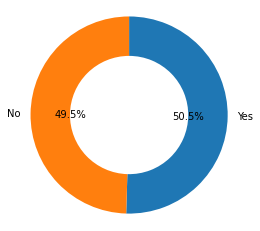

In [56]:
# Plot the count to check whether the borrower is home owner
type_counts = loan_df['HomeOwner'].value_counts()
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%');
plt.axis('square');

From the chart we can find out that the borrowers with Homes were more with 1% which is not very much high. 

### BorrowerRate
The **BorrowerRate** - This is defined as the interest rate on the annual cost of a loan to  a borrower which is expressed as a percentage. 

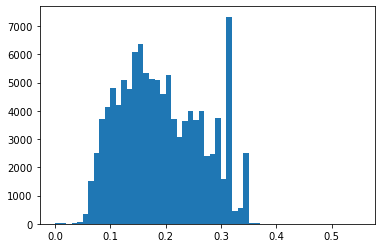

In [22]:
def borrower_rate():
  # define parameters
    bins = np.arange(0, loan_df.BorrowerRate.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins, color=base_color)

borrower_rate()

### BorrowerAPR
The **BorrowerAPR** - This is defined as the annual cost of the loan which contains other fees like discounts and other deductions.

In [23]:
loan_df.BorrowerAPR.describe()

count    112214.000000
mean          0.219127
std           0.080597
min           0.006530
25%           0.156290
50%           0.210250
75%           0.284880
max           0.512290
Name: BorrowerAPR, dtype: float64

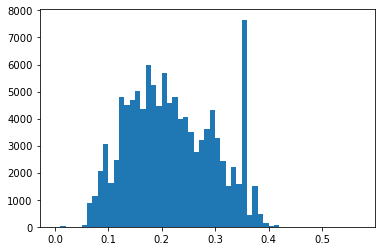

In [24]:
def borrower_apr():
  # define parameters
    bins = np.arange(0, loan_df.BorrowerAPR.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins, color=base_color)
borrower_apr()

The distribution of Borrower rate and Borrower APR looks multimodal. There is a peak centered at 0.2 and there is a very high increase between 0.35 and 0.36.

### StatedMonthlyIncome

**StatedMonthlyIncome** - This is the monthly income declared by the borrower 

In [25]:
loan_df.StatedMonthlyIncome.describe()

count    1.122390e+05
mean     5.602101e+03
std      7.511639e+03
min      0.000000e+00
25%      3.183333e+03
50%      4.666667e+03
75%      6.816208e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

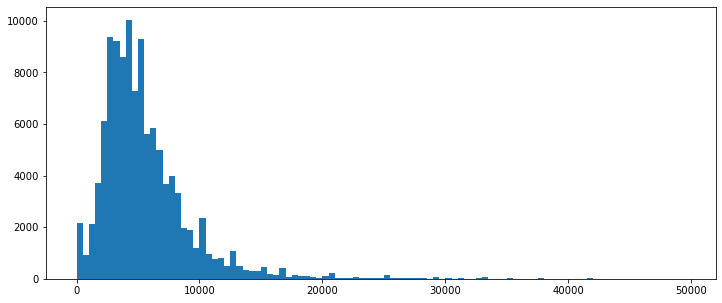

In [26]:
def stated_monthly_income():
  # define parameters
    bins = np.arange(0, 50000, 500)
    plt.figure(figsize=[12, 5])
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins, color=base_color);
stated_monthly_income()

From the graph it seems that most borrowers income is less than 4k with the mean of 5k and the monthly income is skewed to the right. let us now see the other features assosciated with borrowers with more than 10k monthly income 

In [27]:
more_than_10k = loan_df.query("StatedMonthlyIncome >1e5")
more_than_10k

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner,ClosedDate_test,loan_year,loan_month,HomeOwner
8066,500651,NaN,36,Completed,2012-01-26,0.35643,0.3199,IL,Police Officer/Correction Officer,Employed,...,0.00,2000,2011-04-26,87.10,10,True,2012-01-26,2011,4,Yes
8870,66246,A,36,Chargedoff,2009-08-11,0.12700,0.1200,CT,Other,Not available,...,0.01,12500,2006-12-12,415.18,105,True,2009-08-11,2006,12,Yes
17411,501462,NaN,36,Completed,2013-04-11,0.35643,0.3199,HI,Professional,Employed,...,0.00,7500,2011-05-06,326.62,128,True,2013-04-11,2011,5,Yes
35218,461028,NaN,36,Completed,2013-06-11,0.07389,0.0705,VA,Attorney,Full-time,...,NaN,1000,2010-06-11,0.00,58,True,2013-06-11,2010,6,Yes
45028,589104,NaN,36,Current,NaT,0.33973,0.2999,KS,Nurse (RN),Self-employed,...,NaN,4000,2012-05-17,169.78,15,False,NaT,2012,5,No
53014,694401,NaN,12,Completed,2014-01-23,0.25785,0.1795,CA,Other,Self-employed,...,NaN,4000,2013-01-23,366.62,93,True,2014-01-23,2013,1,Yes
53167,560783,NaN,36,Current,NaT,0.35797,0.3177,OR,Professional,Self-employed,...,NaN,4000,2012-02-24,173.71,2,True,NaT,2012,2,Yes
56867,120075,AA,36,Completed,2007-05-11,0.11144,0.1045,NC,Other,Self-employed,...,0.01,25000,2007-04-18,811.97,434,True,2007-05-11,2007,4,Yes
57133,499194,NaN,36,Current,NaT,0.35643,0.3199,CT,Other,Employed,...,0.00,4000,2011-04-05,174.20,72,True,NaT,2011,4,Yes
59298,558458,NaN,36,Current,NaT,0.24246,0.2049,CT,Other,Self-employed,...,NaN,15000,2012-03-20,561.21,204,False,NaT,2012,3,No


It seems that most users who indicated they earn more than 10k dollars a month are self employed and took less than 5k dollars of loan.


### Debt to Income Ratio

**Debt to Income Ratio** - This compares the amount the borrowers owe each month to the amount the borrower earn

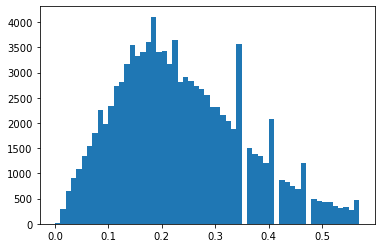

In [28]:
def debt_income_ratio():
  # define parameters
    bins = np.arange(0, loan_df.BorrowerAPR.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins, color=base_color)
debt_income_ratio()

From the graph it shows that most borrowers debt to income ratio is between 18% t0 20%. There was a spike in debt ratio at 35%

### LoanOriginationDate
This is defined as

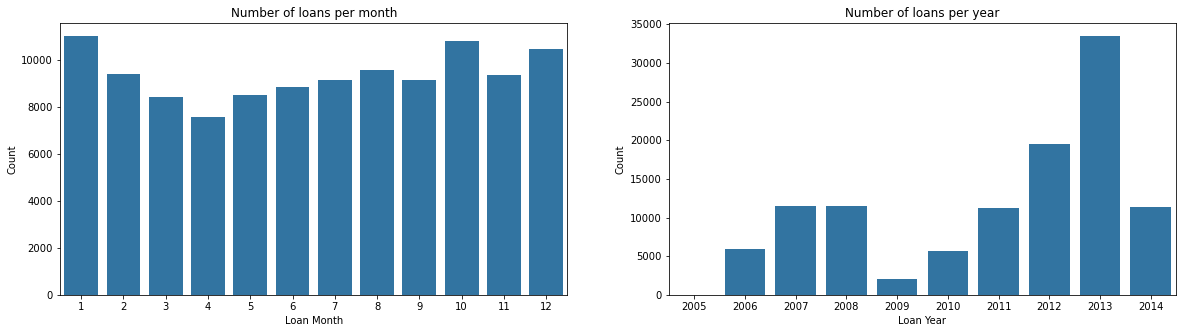

In [29]:
plt.figure(figsize = [20, 5])
#Plot the count of loan on each month 
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='loan_month', color=base_color)
plt.xlabel('Loan Month')
plt.ylabel('Count')
plt.title("Number of loans per month");


# Plot the count of loans on each year
plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='loan_year', color=base_color)
plt.xlabel('Loan Year')
plt.ylabel('Count')
plt.title("Number of loans per year");


From the charts the vizualization loans by month there was a high number of loans in January October and December. It is also noted that the loans by year dropped off in 2009 and there was high number of loans in 2013

### Loan Status

In [30]:
loan_df.LoanStatus.value_counts()

Current                   54928
Completed                 38048
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        794
Past Due (31-60 days)       359
Past Due (61-90 days)       309
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

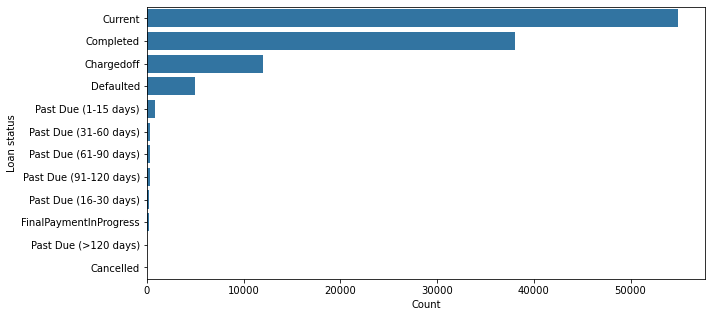

In [31]:
# Plot the count of loans on each year
plt.figure(figsize = [10, 5])
type_counts = loan_df['LoanStatus'].value_counts()
order = type_counts.index
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, y='LoanStatus', color=base_color, order=order)
plt.xlabel('Count')
plt.ylabel('Loan status');


From the chart it shows that most of the loans are Current and quite good number of loans have been completed or paid of fully. Only 5 loans have been cancelled and 16 loans are past due for more than 3 months


### Income Range

In [32]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    31703
$50,000-74,999    30463
$100,000+         17046
$75,000-99,999    16650
Not displayed      7741
$1-24,999          7209
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

We can see that we have `Not employed` and `Not displayed` in the list of ranges. We can put this as `$0` so that we have a clean chart

In [33]:
#Replace Not employed and Not displayed with $0
loan_df["IncomeRange"].replace(["Not employed", "Not displayed"], "$0", inplace=True)

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\1147241080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["IncomeRange"].replace(["Not employed", "Not displayed"], "$0", inplace=True)


In [34]:
# create categories
categories = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
var = pd.api.types.CategoricalDtype(ordered = True, categories = categories)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(var)

C:\Users\samso\AppData\Local\Temp\ipykernel_10880\3155848670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(var)


In [35]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    31703
$50,000-74,999    30463
$100,000+         17046
$75,000-99,999    16650
$1-24,999          7209
$0                  621
Name: IncomeRange, dtype: int64

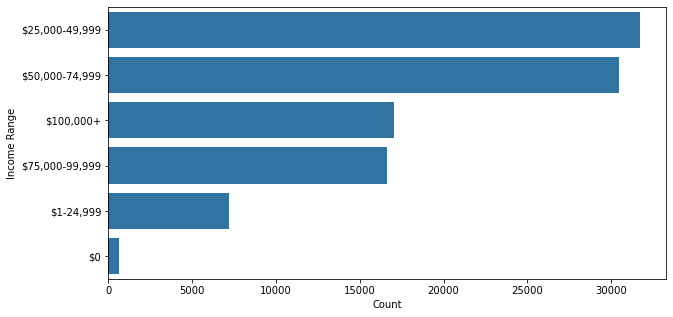

In [36]:
# Plot the count of loans on each year
plt.figure(figsize = [10, 5])
type_counts = loan_df['IncomeRange'].value_counts()
order = type_counts.index
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, y='IncomeRange', color=base_color, order=order)
plt.xlabel('Count')
plt.ylabel('Income Range');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrower rate and Borrower APR looks multimodal. There is a peak centered at 0.2 and there is a very high increase between 0.35 and 0.36
>  Most borrowers debt to income ratio is between 18% t0 20%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed that there was a high number of loans in January October and December months of the year which also was noted that the loans by year dropped off from 2008 to 2009 and there was high number of loans in 2013. 
> I also noted that most of the borrowers have monthly income of less than 4k dollars where those that have more than 10k monthly icome was borrowing less than 4k dollars.
> There is no need of further transformation of data

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Borrowers Rate Vs Period

In [37]:
loan_df.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner,ClosedDate_test,loan_year,loan_month,HomeOwner
0,193129,C,36,Completed,2009-08-14,0.16516,0.1580,CO,Other,Self-employed,...,0.17,9425,2007-09-12,330.43,258,True,2009-08-14,2007,9,Yes
1,1209647,NaN,36,Current,NaT,0.12016,0.0920,CO,Professional,Employed,...,0.18,10000,2014-03-03,318.93,1,False,NaT,2014,3,No
2,81716,HR,36,Completed,2009-12-17,0.28269,0.2750,GA,Other,Not available,...,0.06,3001,2007-01-17,123.32,41,False,2009-12-17,2007,1,No
3,658116,NaN,36,Current,NaT,0.12528,0.0974,GA,Skilled Labor,Employed,...,0.15,10000,2012-11-01,321.45,158,True,NaT,2012,11,Yes
4,909464,NaN,36,Current,NaT,0.24614,0.2085,MN,Executive,Employed,...,0.26,15000,2013-09-20,563.97,20,True,NaT,2013,9,Yes


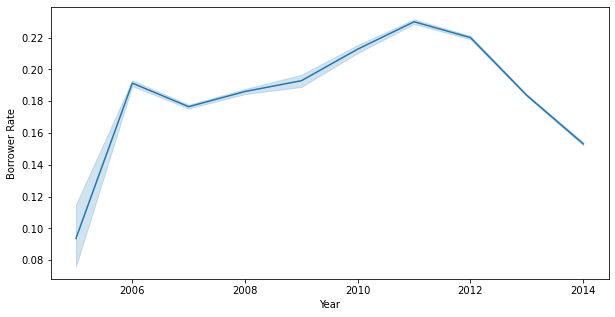

In [38]:
#Plot a line graph over time
plt.figure(figsize = [10, 5])
sns.lineplot(data=loan_df, x="loan_year", y="BorrowerRate")
plt.xlabel('Year')
plt.ylabel('Borrower Rate');

Borrower's rate is defined as the interest rate on the annual cost of a loan to a borrower which is expressed as a percentage.
As you can see from the chart this rate increased between 2007 an 2011 qhich is seen to reduce steadily from 2012 to 2014

Text(0, 0.5, 'Borrowers Rate')

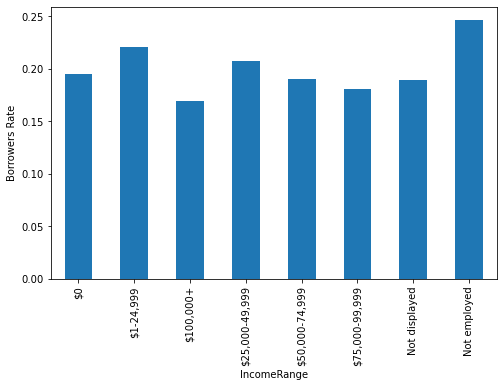

In [125]:
plot_data = loan_df.groupby('IncomeRange')['BorrowerRate'].mean()
order = plot_data.index
plot_data.index
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False)
plt.ylabel('Borrowers Rate')

<AxesSubplot:xlabel='BorrowerRate', ylabel='IncomeRange'>

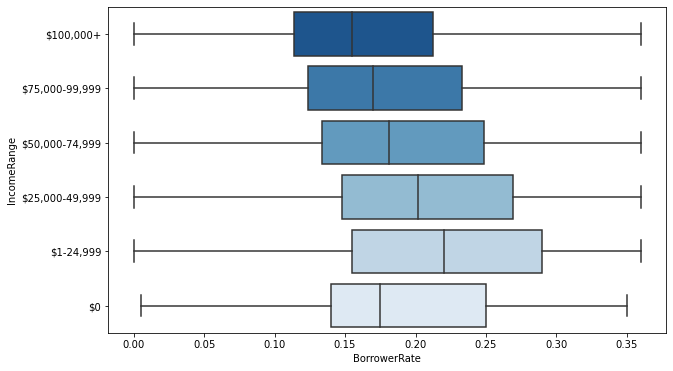

In [39]:
#Plot a box plot between income range and the year
plt.figure(figsize = [10, 6])
sns.boxplot(data = loan_df, x="BorrowerRate", y="IncomeRange", palette = 'Blues_r')


<AxesSubplot:xlabel='BorrowerRate', ylabel='EmploymentStatus'>

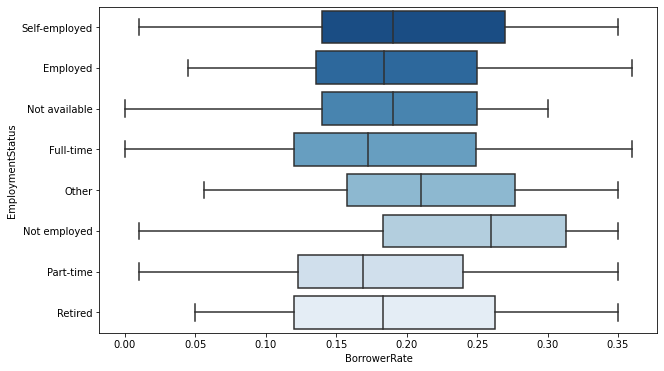

In [40]:
#Plot a box plot between income range and the year
plt.figure(figsize = [10, 6])
sns.boxplot(data = loan_df, x="BorrowerRate", y="EmploymentStatus", palette = 'Blues_r')


<AxesSubplot:xlabel='loan_year', ylabel='BorrowerRate'>

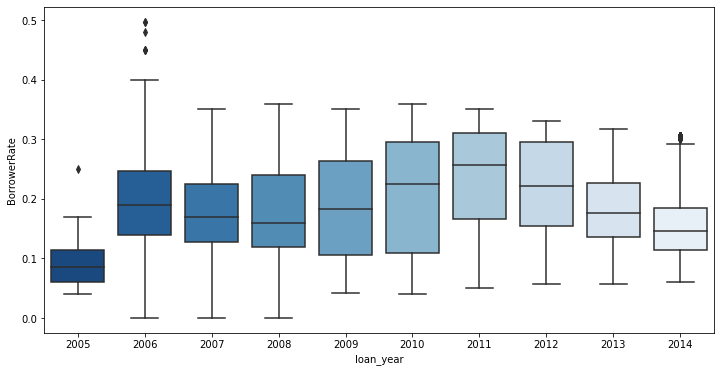

In [66]:
#Plot a box plot between income range and the year
plt.figure(figsize = [12, 6])
sns.boxplot(data = loan_df, x="loan_year", y="BorrowerRate", palette = 'Blues_r')


We can see that borrowers in 2011 got the highest interest rate compared to borrowers in 2005 who got the lowest interest rate

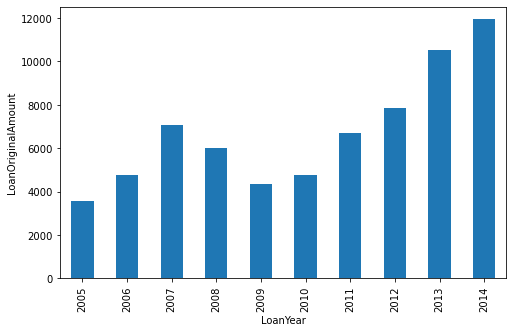

In [60]:
#Plot a graph to show Loan amount borrowed over time
loan_df.groupby('loan_year')['LoanOriginalAmount'].mean().plot(kind='bar',color=base_color,figsize=(8,5), legend=False)
plt.ylabel('LoanOriginalAmount')
plt.xlabel('LoanYear');

From the charts it shows that the amount of loans borrowered by year dropped off in 2009 and there was high number of loan amount in 2013 and increased steadily after 2009

Text(0, 0.5, 'LoanOriginalAmount')

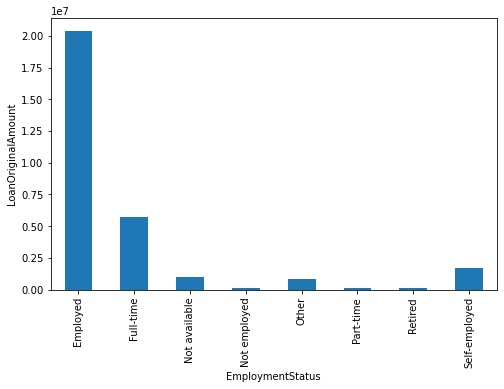

In [76]:
plot_data = loan_df.groupby('EmploymentStatus')['MonthlyLoanPayment'].sum()
order = plot_data.index
plot_data.index
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False)
plt.ylabel('LoanOriginalAmount')

We can see that those who are employed borrowed more amount followed by borrowers with Full-time jobs. This can be true because of job security. Borrowers with job security have high borrowers rate

Text(0, 0.5, 'LoanOriginalAmount')

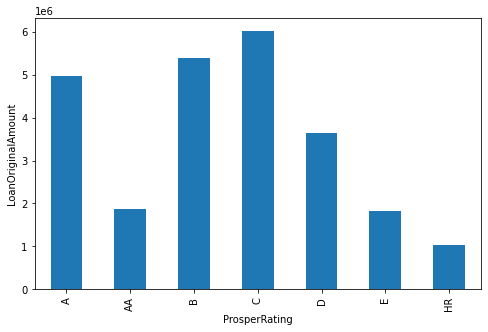

In [121]:
plot_data = loan_df.groupby('ProsperRating')['MonthlyLoanPayment'].sum()
order = plot_data.index
plot_data.index
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False)
plt.ylabel('LoanOriginalAmount')

We can see that the borrowers with prosper rating C borrowed more amount compared to even the borrowers with prosper rating of A. Hower the borrowes with the least prosper rating `HR` has the least total amount borrowed

In [44]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingNumber                112239 non-null  int64         
 1   CreditGrade                  28953 non-null   object        
 2   Term                         112239 non-null  int64         
 3   LoanStatus                   112239 non-null  object        
 4   ClosedDate                   55063 non-null   datetime64[ns]
 5   BorrowerAPR                  112214 non-null  float64       
 6   BorrowerRate                 112239 non-null  float64       
 7   BorrowerState                106724 non-null  object        
 8   Occupation                   108766 non-null  object        
 9   EmploymentStatus             109984 non-null  object        
 10  InvestmentFromFriendsCount   112239 non-null  int64         
 11  InvestmentFromFriendsAmoun

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> rom the start I choose Borrowers Rate as I think it has effect on the potential amount the borrower can be entitled to. I noticed that the Borrower Rate has effect on the amount where the amount borrowed increased with higher ratings across all terms

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers with more monthly income and borrowers rate was borrowing more money and there fore the loan amount is positivey correlated with stated monthly income and borrowers rate.

## Multivariate Exploration

### Borrowers Rate Vs Employment status over time

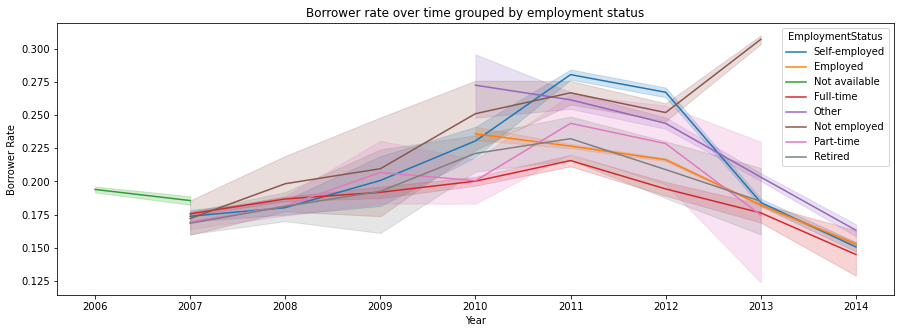

In [77]:
#Plot a line graph over time
plt.figure(figsize = [15, 5])
sns.lineplot(data=loan_df, x="loan_year", y="BorrowerRate", hue="EmploymentStatus")
plt.xlabel('Year')
plt.ylabel('Borrower Rate')
plt.title('Borrower rate over time grouped by employment status')
plt.show()

From the graph we find out that those borrowers with Full time job was getting lowest interest rate over time and those who are self employed and Not employed had high interest rate.
Also we can see that the interest rate for those not employed increased significantly from 2012 while those employed and with full time jpob decreased signficantly at the same period.
This can be because of job security and repayment confidence.

### Borrowers rate Vs HomeOwners

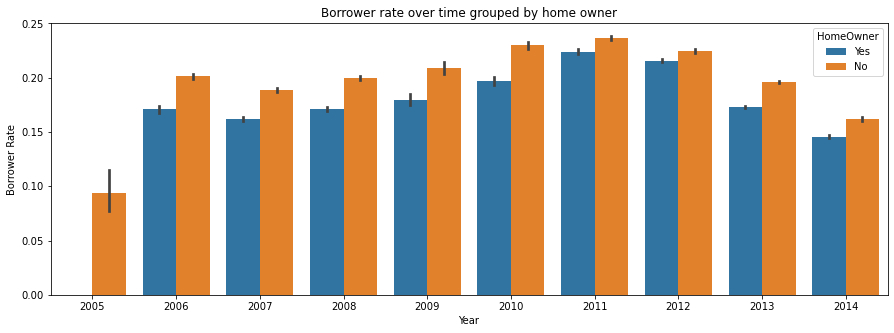

In [81]:
#Plot borrower bar graph over time
plt.figure(figsize = [15, 5])
sns.barplot(data=loan_df, x="loan_year", y="BorrowerRate", hue="HomeOwner")
plt.xlabel('Year')
plt.ylabel('Borrower Rate')
plt.title('Borrower rate over time grouped by home owner')
plt.show();

This also shows that the intereste rate for borrowers also depended on whether the borrower had a home or not. It shows that those with homes had lower interest rate compared to those without homes

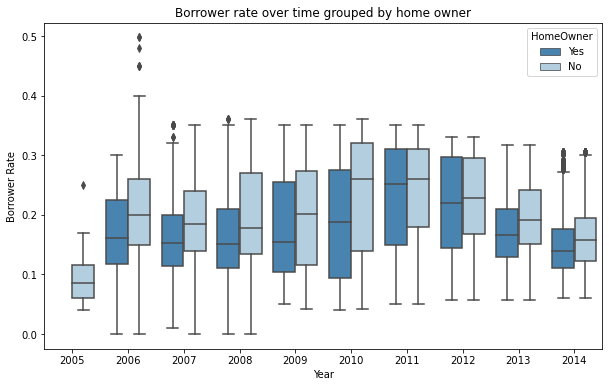

In [117]:
#Plot a box plot between borrowers rate and the year grouped by if the borrower is a home owner
plt.figure(figsize = [10, 6])
sns.boxplot(data = loan_df, x="loan_year", y="BorrowerRate", hue="HomeOwner", palette = 'Blues_r')
plt.xlabel('Year')
plt.ylabel('Borrower Rate')
plt.title('Borrower rate over time grouped by home owner')
plt.show();

I wanted to check the relationship between Interest rate among borrowers with home and those without. From the chart we can notice that the homeowners got lower interest  rate in general throughout the years.
We also have outliers on 2005 2006 2007 2008 and 2014. we might consider removing them if we decide to do predictive analysis

In [116]:
#Plot a box plot between borrowers rate and the year grouped by if the borrower is a home owner
loan_df['LoanOriginalAmount']=loan_df['LoanOriginalAmount'].astype(int)
# plt.figure(figsize = [20, 6])
# sns.boxplot(data = loan_df, x="ProsperRating", y="LoanOriginalAmount", hue="LoanStatus", palette = 'Blues_r')


C:\Users\samso\AppData\Local\Temp\ipykernel_10880\2740802363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['LoanOriginalAmount']=loan_df['LoanOriginalAmount'].astype(int)


In [112]:
data= loan_df[loan_df['ProsperRating'].notna()]
data.ProsperRating.value_counts()
#data['ProsperRating']=data['ProsperRating'].astype(int)

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

Text(0.5, 1.0, 'Loan amount given by Prosper rating ')

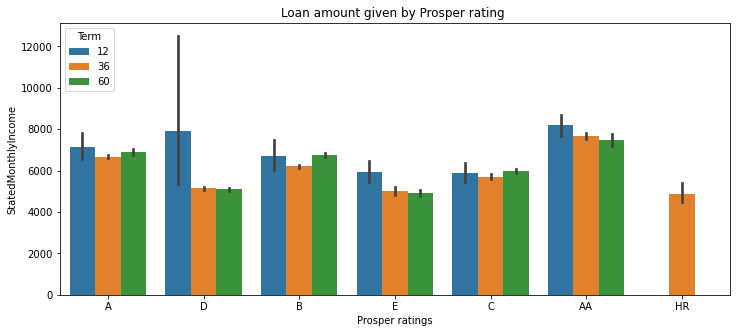

In [123]:
plt.figure(figsize = [12, 5])
sns.barplot(data=loan_df, x="ProsperRating", y="StatedMonthlyIncome", hue="Term")
plt.xlabel('Prosper ratings')
plt.title('Loan amount given by Prosper rating ')

From the graph we can see that there is a relationship between the ratings and the amount of loan given. The better the rating the higher the loan amount. Also in most of the terms it seems that most borrowers preferred short terms where short term borrowed more than those with long term

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the start I choose `Borrowers Rate` as I think it has effect on the potential amount the borrower can be entitled to. 
I noticed that the Borrower Rate has effect on the amount where the amount borrowed increased with higher ratings across all terms 

### Were there any interesting or surprising interactions between features?

> From the analysis I was able to find out that those borrowers with Full time job was getting lowest interest rate over time and those who are self employed and Not employed had high interest rate. 

> Also those employed and those with full time job got lowest interests over time

> Employed and self employed borrowed high amounts

> Loan amount borrowed decred from 2007 to 2009 but increased steadily from 2009 to 2014

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

